In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
train_original=train.copy()
test_original=test.copy()

In [ ]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
train.shape,test.shape

((614, 13), (367, 12))

In [ ]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<Axes: >

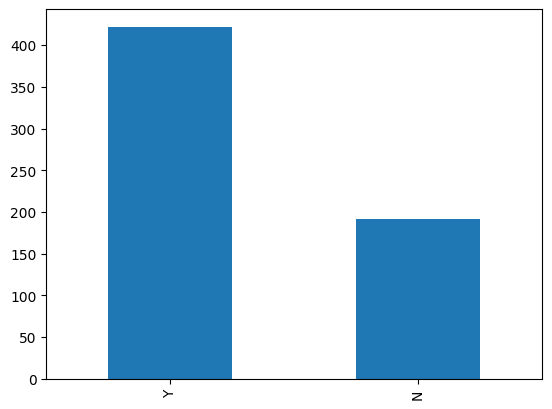

In [ ]:
train["Loan_Status"].value_counts().plot.bar()

<Axes: title={'center': 'Credit History'}>

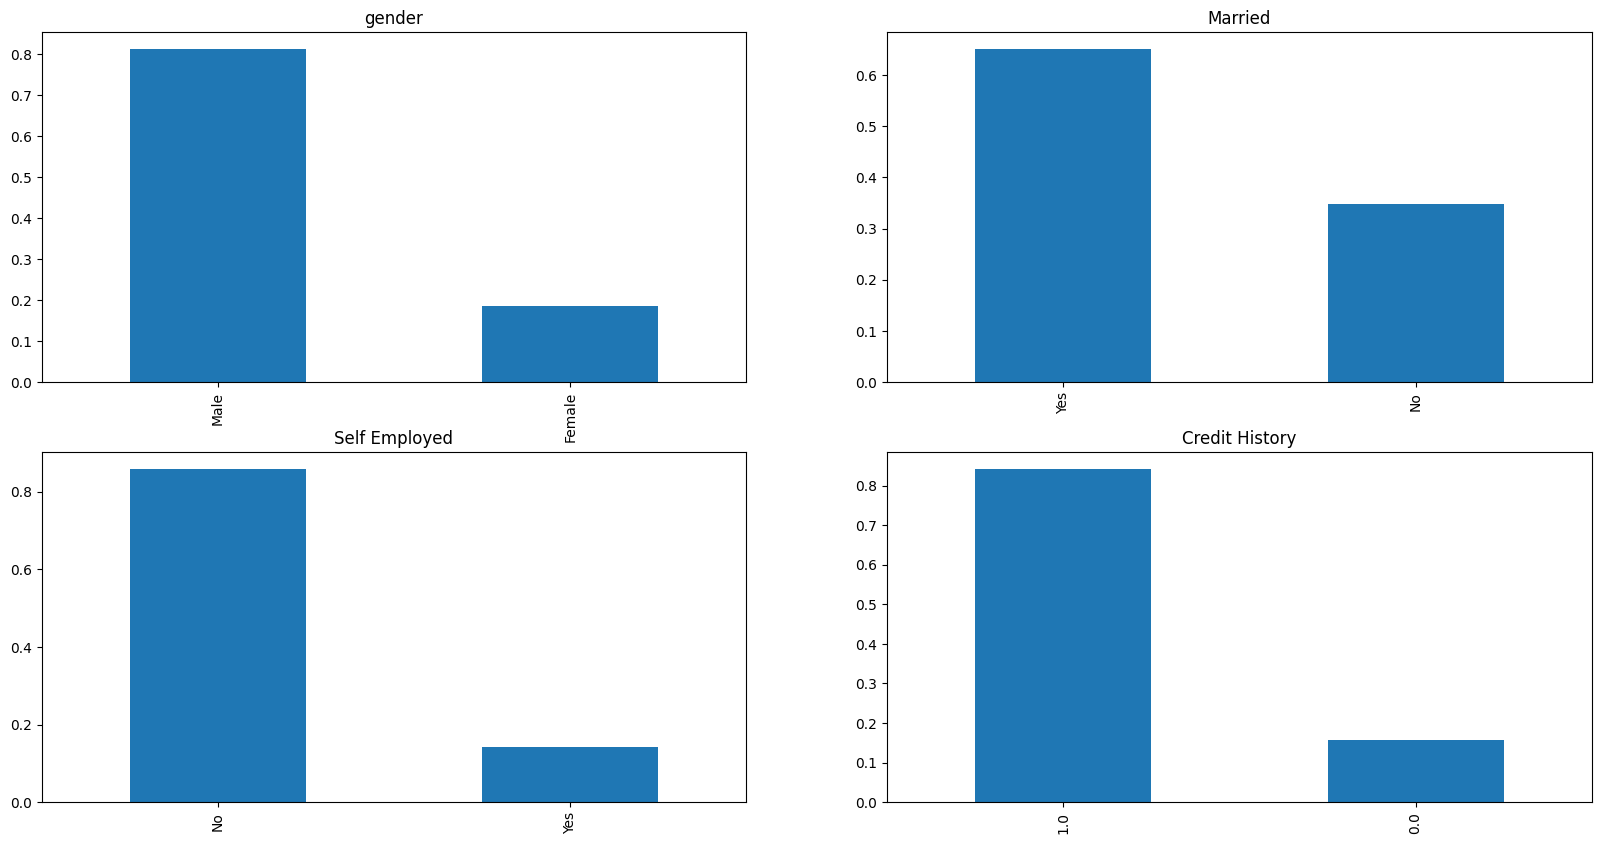

In [ ]:
plt.subplot(221)
train["Gender"].value_counts(normalize=True).plot.bar(title="gender",figsize=(20,10))
plt.subplot(222)
train["Married"].value_counts(normalize=True).plot.bar(title="Married")
plt.subplot(223)
train["Self_Employed"].value_counts(normalize=True).plot.bar(title="Self Employed")
plt.subplot(224)
train["Credit_History"].value_counts(normalize=True).plot.bar(title="Credit History")

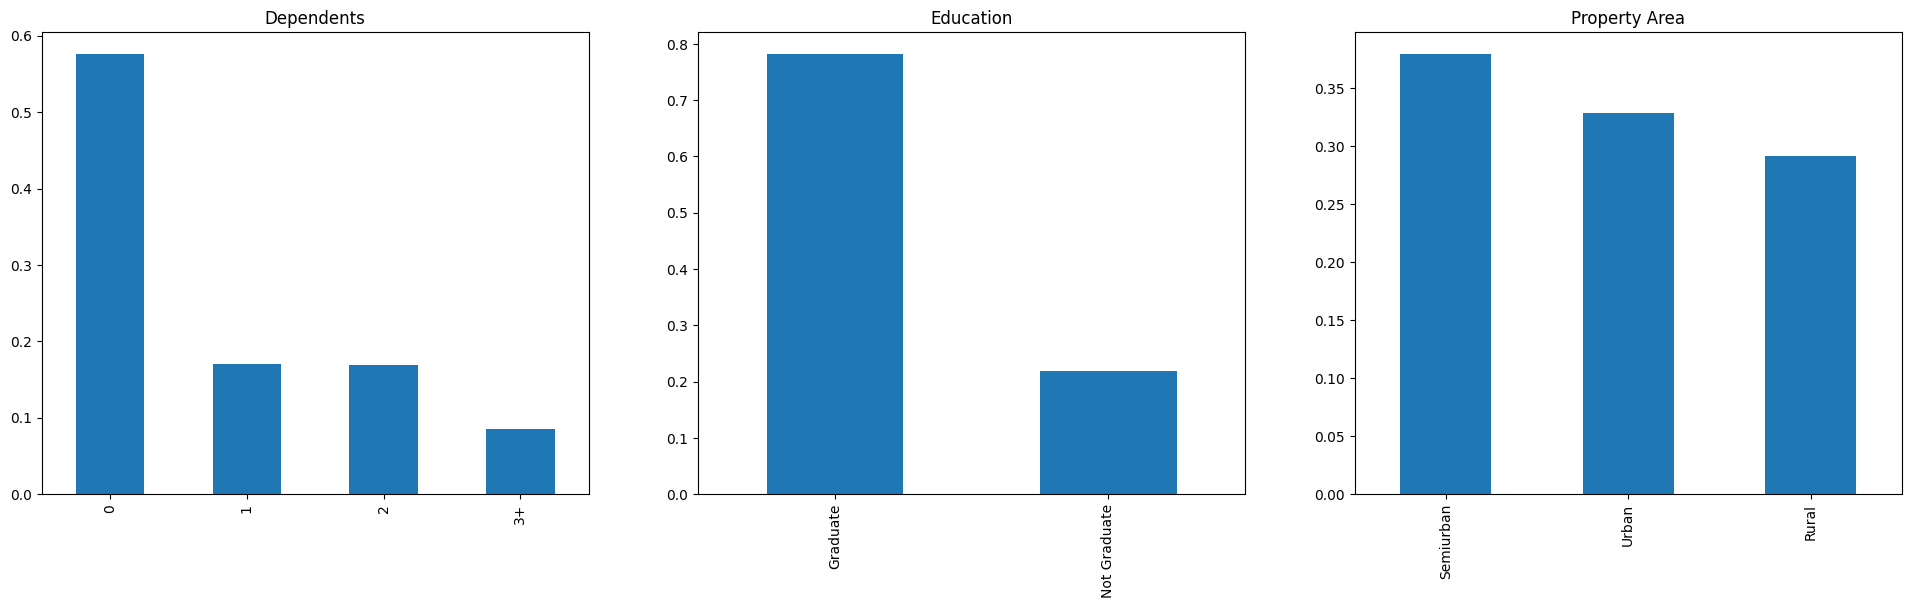

In [ ]:
plt.figure(1)
plt.subplot(131)
train["Dependents"].value_counts(normalize=True).plot.bar(title="Dependents",figsize=(24,6))
plt.subplot(132)
train["Education"].value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(133)
train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property Area")
plt.show()

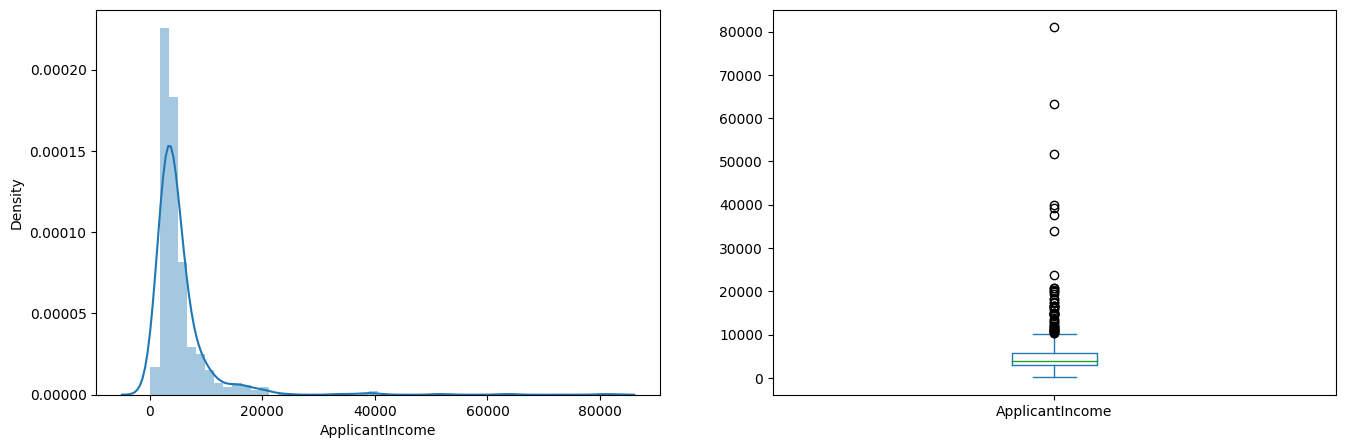

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["ApplicantIncome"])
plt.subplot(122)
train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Text(0.5, 0.98, '')

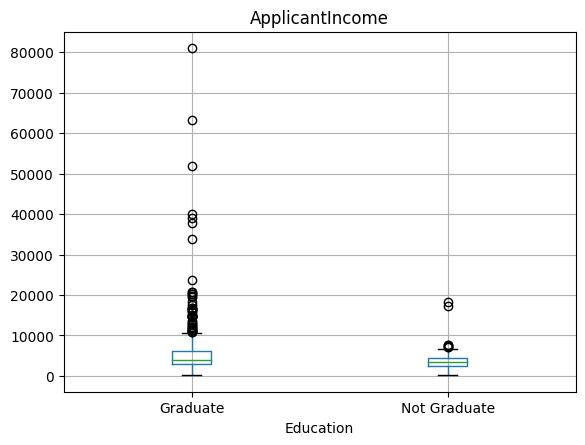

In [ ]:
train.boxplot(column="ApplicantIncome",by="Education")
plt.suptitle("")
plt.text(0.5,0.98,"")


<Axes: title={'center': 'CoapplicantIncome'}>

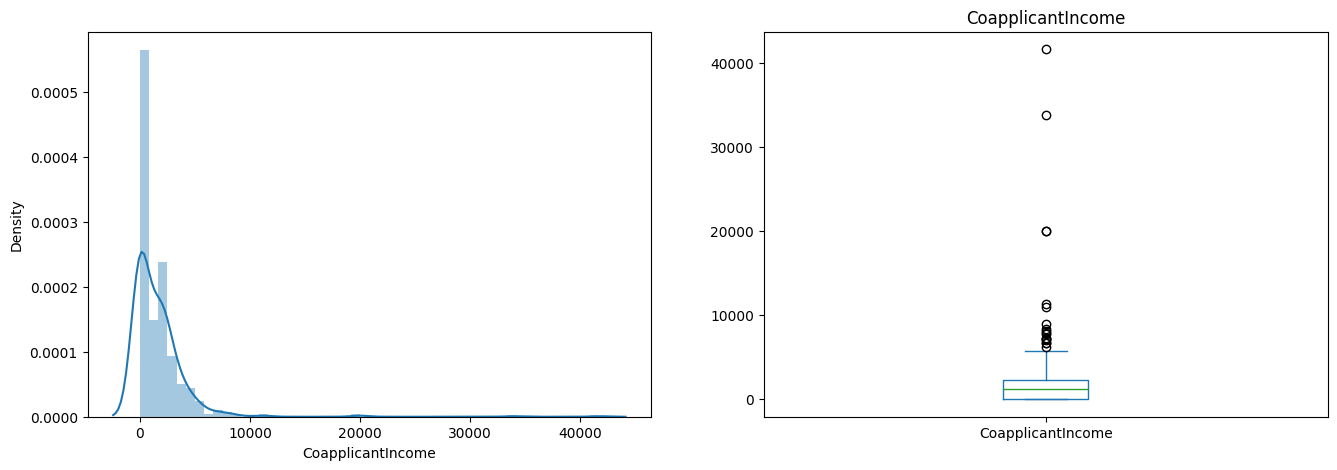

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["CoapplicantIncome"])
plt.subplot(122)
train["CoapplicantIncome"].plot.box(figsize=(16,5),title="CoapplicantIncome")

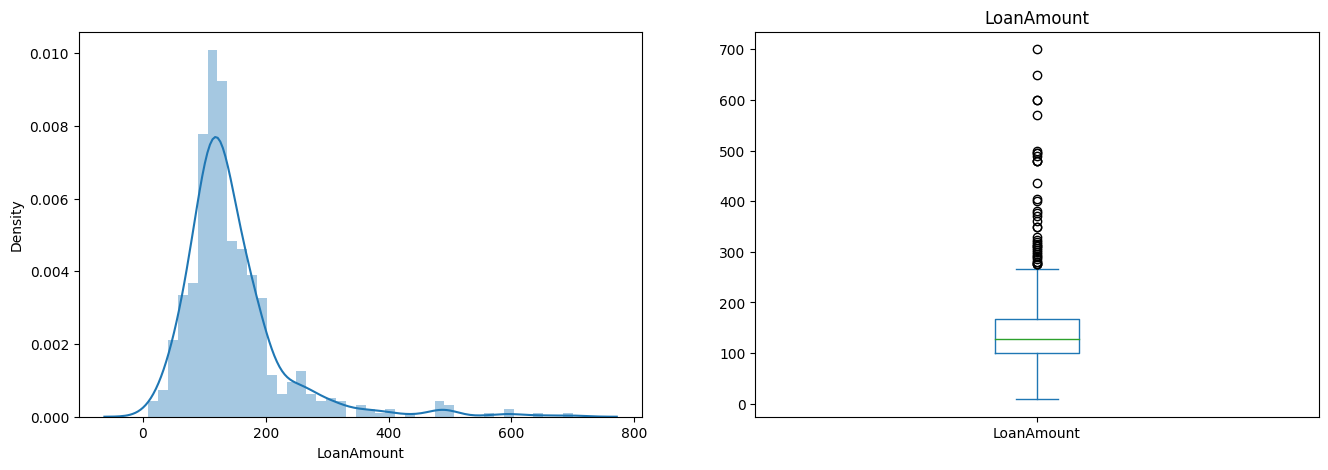

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train["LoanAmount"])
plt.subplot(122)
train["LoanAmount"].plot.box(figsize=(16,5),title="LoanAmount")
df=train.dropna()

<Axes: xlabel='Gender'>

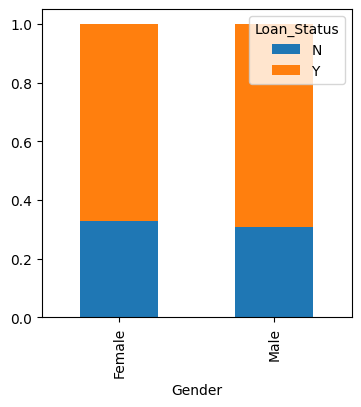

In [ ]:

Gender=pd.crosstab(train["Gender"],train["Loan_Status"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

<Axes: xlabel='Self_Employed'>

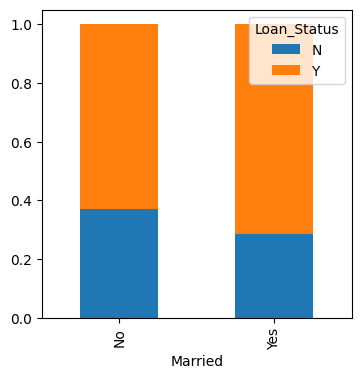

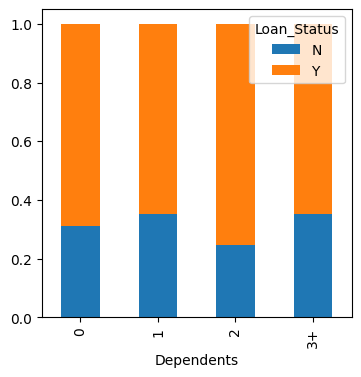

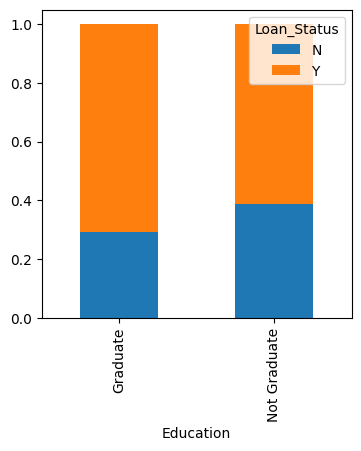

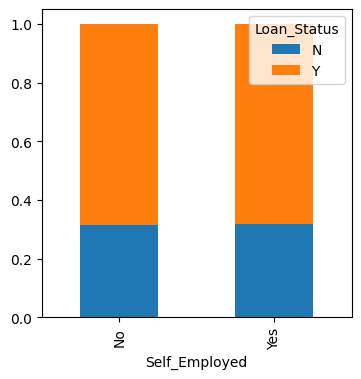

In [ ]:

Married=pd.crosstab(train["Married"],train["Loan_Status"])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Dependents=pd.crosstab(train["Dependents"],train["Loan_Status"])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Education=pd.crosstab(train["Education"],train["Loan_Status"])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Self_Employed=pd.crosstab(train["Self_Employed"],train["Loan_Status"])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

<Axes: xlabel='Property_Area'>

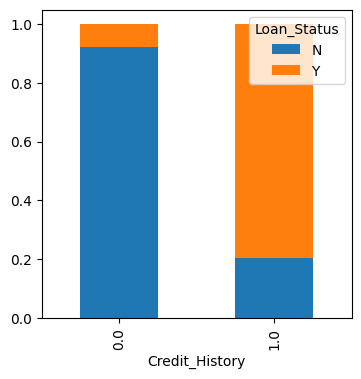

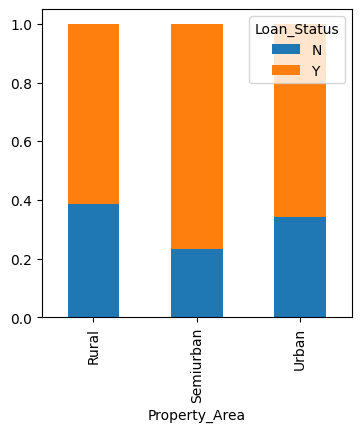

In [ ]:

Credit_History=pd.crosstab(train["Credit_History"],train["Loan_Status"])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

Property_Area=pd.crosstab(train["Property_Area"],train["Loan_Status"])
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))

<Axes: xlabel='Loan_Status'>

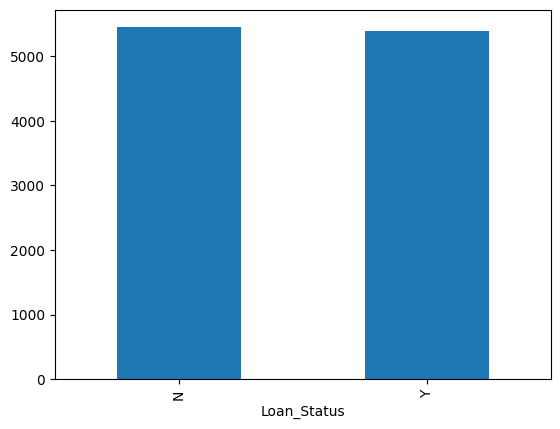

In [ ]:
train.groupby("Loan_Status")["ApplicantIncome"].mean().plot.bar()

<Axes: xlabel='Income_bin'>

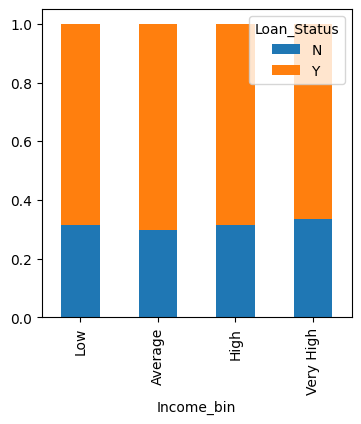

In [ ]:
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very High"]
train["Income_bin"]=pd.cut(train["ApplicantIncome"],bins,labels=group)
Income_bin=pd.crosstab(train["Income_bin"],train["Loan_Status"])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))


<Axes: xlabel='Coapplicant_Income_bin'>

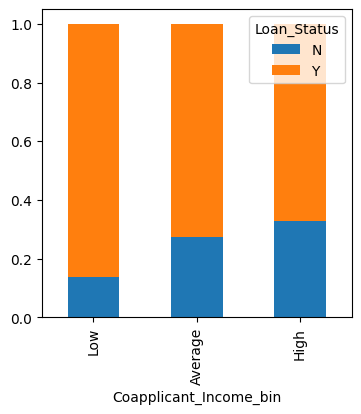

In [ ]:
bins=[0,1000,3000,42000]
group=["Low","Average","High"]
train["Coapplicant_Income_bin"]=pd.cut(train["CoapplicantIncome"],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train["Coapplicant_Income_bin"],train["Loan_Status"])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))


<Axes: xlabel='Total_Income_bin'>

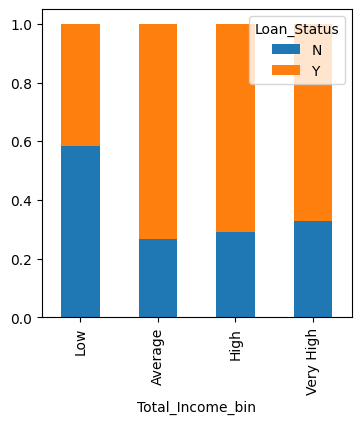

In [ ]:
train["Total_Income"]=train["ApplicantIncome"]+train["CoapplicantIncome"]
bins=[0,2500,4000,6000,81000]
group=["Low","Average","High","Very High"]
train["Total_Income_bin"]=pd.cut(train["Total_Income"],bins,labels=group)
Total_Income_bin=pd.crosstab(train["Total_Income_bin"],train["Loan_Status"])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))


<Axes: xlabel='LoanAmount_bin'>

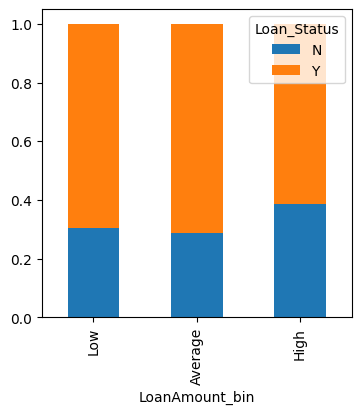

In [ ]:
bins=[0,100,200,700]
group=["Low","Average","High"]
train["LoanAmount_bin"]=pd.cut(train["LoanAmount"],bins,labels=group)
LoanAmount_bin=pd.crosstab(train["LoanAmount_bin"],train["Loan_Status"])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))


In [ ]:
train=train.drop(["Income_bin","Coapplicant_Income_bin","LoanAmount_bin","Total_Income_bin","Total_Income"],axis=1)

In [ ]:
train["Dependents"].replace("3+",3,inplace=True)
test["Dependents"].replace("3+",3,inplace=True)
train["Loan_Status"].replace("N",0,inplace=True)
train["Loan_Status"].replace("Y",1,inplace=True)

<Axes: >

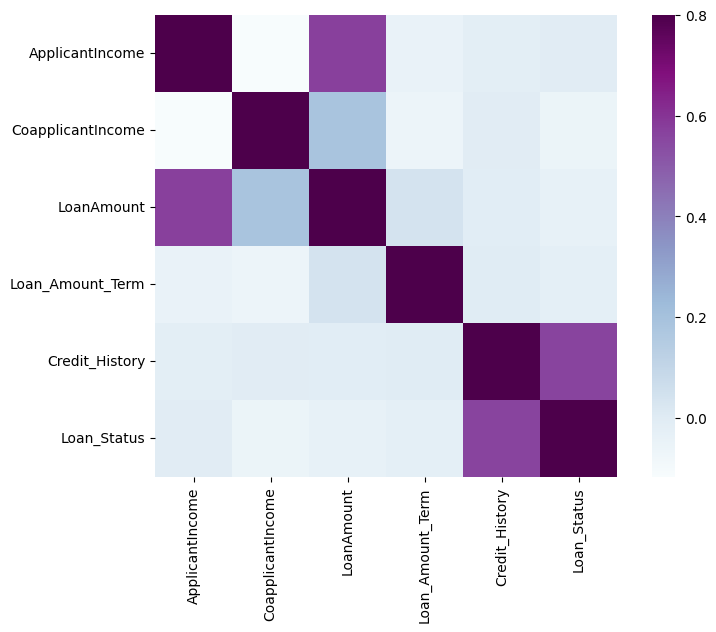

In [ ]:
matrix=train.corr()
f,ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=0.8,square=True,cmap="BuPu")

In [ ]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train["Married"].fillna(train["Married"].mode()[0],inplace=True)
train["Dependents"].fillna(train["Dependents"].mode()[0],inplace=True)
train["Self_Employed"].fillna(train["Self_Employed"].mode()[0],inplace=True)
train["Credit_History"].fillna(train["Credit_History"].mode()[0],inplace=True)

In [ ]:
train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0],inplace=True)

In [ ]:
train["LoanAmount"].fillna(train["LoanAmount"].median(),inplace=True)

In [ ]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
test["Gender"].fillna(test["Gender"].mode()[0],inplace=True)
test["Married"].fillna(test["Married"].mode()[0],inplace=True)
test["Dependents"].fillna(test["Dependents"].mode()[0],inplace=True)
test["Self_Employed"].fillna(test["Self_Employed"].mode()[0],inplace=True)
test["Credit_History"].fillna(test["Credit_History"].mode()[0],inplace=True)
test["Loan_Amount_Term"].fillna(test["Loan_Amount_Term"].mode()[0],inplace=True)
test["LoanAmount"].fillna(test["LoanAmount"].median(),inplace=True)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,4.852030
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,4.948760


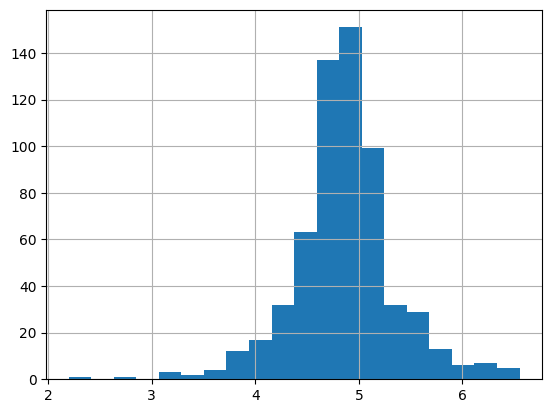

In [ ]:
train["LoanAmount_Log"]=np.log(train["LoanAmount"])
train["LoanAmount_Log"].hist(bins=20)
test["LoanAmount_Log"]=np.log(test["LoanAmount"])
train.head()

In [ ]:
train=train.drop("Loan_ID",axis=1)
test=test.drop("Loan_ID",axis=1)

In [ ]:
X=train.drop("Loan_Status",1)
y=train.Loan_Status

In [ ]:
X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv=train_test_split(X,y,test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,
                  intercept_scaling=1,max_iter=100,multi_class="ovr",n_jobs=1,
                  penalty='l2',random_state=1,solver="liblinear",tol=0.0001,
                  verbose=0,warm_start=False)
model.fit(x_train,y_train)


LogisticRegression(multi_class='ovr', n_jobs=1, random_state=1,
                   solver='liblinear')

In [ ]:
pred_cv=model.predict(x_cv)


In [ ]:
accuracy_score(y_cv,pred_cv)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('RF',RandomForestClassifier(n_estimators=10,criterion="entropy",random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('CART', DecisionTreeClassifier(criterion="entropy",random_state=0)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(kernel='rbf',random_state=0)))

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold,      scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.812559 (0.044538)
RF: 0.752459 (0.038263)
KNN: 0.630328 (0.049653)
CART: 0.728001 (0.046335)
NB: 0.791486 (0.047301)
SVM: 0.687229 (0.041427)
